In [1]:
import os
import random
import numpy as np
from pathlib import Path

import torch
import torchvision
from matplotlib import pyplot as plt
from PIL import Image

from torch.utils.data import Dataset, DataLoader
from timm.data.mixup import Mixup
from timm.data.dataset import ImageDataset
from timm.data.loader import create_loader

In [7]:
def get_dataset_and_loader(mixup_args):
    mixup_fn = Mixup(**mixup_args)
    dataset = ImageDataset('/data1/ImageNet1K/Annotations/Data/CLS-LOC/train/')
    loader = create_loader(dataset, 
                           input_size=(3,224,224), 
                           batch_size=6, 
                           is_training=True, 
                           use_prefetcher=False)
    return mixup_fn, dataset, loader

In [46]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [47]:
mixup_args = {
    'mixup_alpha': 1.,
    'cutmix_alpha': 0.,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.,
    'mode': 'batch',
    'label_smoothing': 0,
    'num_classes': 10}

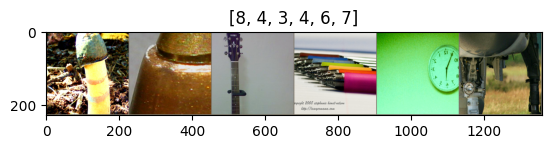

In [54]:
mixup_fn, dataset, loader = get_dataset_and_loader(mixup_args)
inputs, classes = next(iter(loader))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[x.item() for x in classes])

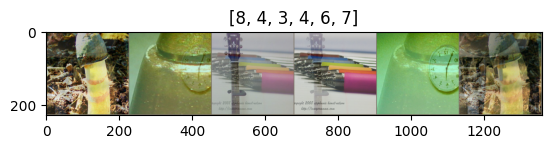

In [55]:
inputs, classes = mixup_fn(inputs, classes)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[x.item() for x in classes.argmax(1)])

In [ ]:
mixup_args = {
    'mixup_alpha': 0.,
    'cutmix_alpha': 1.0,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.,
    'mode': 'batch',
    'label_smoothing': 0,
    'num_classes': 1000}

In [ ]:
mixup_fn, dataset, loader = get_dataset_and_loader(mixup_args)
inputs, classes = next(iter(loader))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[x.item() for x in classes])

In [ ]:
inputs, classes = mixup_fn(inputs, classes)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[x.item() for x in classes.argmax(1)])